In [2]:
import pandas as pd
import random

In [3]:
import random           # подключаем модуль random
import pandas as pd     # переносим библиотеку анализа данных pandas в нашу текущую среду 

class ClusterGenerator: # задаем сам класс

    def column(self, name, center, spread): # назначаем метод, который возвращает имя (name), 
                                            # среднее значение данных (center) и степень разброса данных вокруг среднего (spread)
                                            # self позволяет позже ссылаться на конкретный экземпляр - объект класса
        return {'name': name, 'center': center, 'spread': spread} # возвращаем значения name, center и spread в виде словаря

    def generate(self, n_rows, columns):    # назначаем метод, который генерирует набор данных
        data = {}                           # указываем исходный набор данных в виде пустого словаря
        for column in columns:              # задаем цикл для каждой колонки (column) в наборе колонок (columns)
           
            # задаем генерирование данных - при помощи модуля генерации случайных величин с нормальным 
            # распределением random.gauss для формирования колонок с определенным количеством строк (от 0 до n_rows)
            
            data[column['name']] = [random.gauss(column['center'], column['spread']) for _ in range(n_rows)]
        return pd.DataFrame(data)           # возвращаем готовый набор данных

In [4]:
cg = ClusterGenerator()

# создаем первый dataframe: мужчины, средний возраст 33 года, средний рост 180 см
male_df = cg.generate(10, [
        cg.column('Age', center=33, spread=3),
        cg.column('Height', center=180, spread=10)              
        ])

# добавляем колонку для обозначения пола
male_df['gender'] = 'male'

# создаем второй dataframe: женщины, средний возраст 27 года, средний рост 170 см
female_df = cg.generate(10, [
        cg.column('Age', center=27, spread=3),
        cg.column('Height', center=170, spread=10)              
        ])

# добавляем колонку для обозначения пола
female_df['gender'] = 'female'

# объединим два набора данных  в один
df = pd.concat([male_df, female_df]).reset_index(drop=True)

# итоговый результат
display(df)

,Age,Height,gender
0,37.819211,179.597735,male
1,30.223426,196.873728,male
2,39.747089,182.020047,male
3,30.938211,185.298778,male
4,32.200223,173.945039,male
5,32.211466,176.608346,male
6,30.694120,185.581628,male
7,34.719919,182.652439,male
8,30.863335,190.573882,male
9,38.295772,176.204069,male


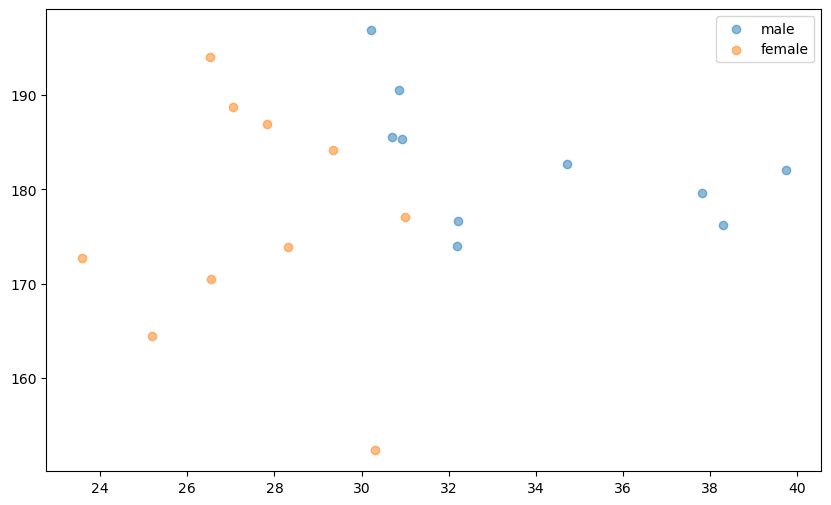

In [5]:
# ВИЗУАЛИЗАЦИЯ
# импортируем библиотеку для визуализации данных
import matplotlib.pyplot as plt

# задаем размеры области построения будущего графика
plt.figure(figsize=(10, 6))

# перебирая все уникальные значения в колонке "gender" передаем его для фильтрации
for gender in df.gender.unique():
    # каждый пол отрисовываем на графике отдельным слоем и задаем метку
    plt.scatter(
        df[df.gender == gender]['Age'], # значения по оси x
        df[df.gender == gender]['Height'], # значения по оси y
        alpha=0.5, # добавляем точкам на графике полупрозрачность
        label=gender # метка пола, которая отображается на легенде
        )
plt.legend() # отображаем легенду с метками
plt.show() # выводим график